# Spatial Coalescence Model
Rowan Hart

In [18]:
# Import Software
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools
import pyslim

np.random.seed(23)

### Veiw the Tree Data


In [25]:
# PySLiM
slim_ts = pyslim.tskit.load("osmand_20000Anc.trees")
print(f"The tree sequence has {slim_ts.num_trees} trees\n"
      f"on a genome of length {slim_ts.sequence_length},\n"
      f"{slim_ts.num_individuals} individuals, {slim_ts.num_samples} 'sample' genomes,\n"
      f"and {slim_ts.num_mutations} mutations.")

The tree sequence has 102567 trees
on a genome of length 100000000.0,
10712340 individuals, 8968 'sample' genomes,
and 0 mutations.


In [26]:
individual_times = slim_ts.individuals_time
for t in np.unique(individual_times):
    print(f"There are {np.sum(individual_times == t)} individuals from time {t}.")

There are 4484 individuals from time 0.0.
There are 3582 individuals from time 1.0.
There are 3146 individuals from time 2.0.
There are 2868 individuals from time 3.0.
There are 2629 individuals from time 4.0.
There are 2465 individuals from time 5.0.
There are 2366 individuals from time 6.0.
There are 2234 individuals from time 7.0.
There are 2168 individuals from time 8.0.
There are 2094 individuals from time 9.0.
There are 2033 individuals from time 10.0.
There are 1963 individuals from time 11.0.
There are 1950 individuals from time 12.0.
There are 1891 individuals from time 13.0.
There are 1822 individuals from time 14.0.
There are 1798 individuals from time 15.0.
There are 1783 individuals from time 16.0.
There are 1734 individuals from time 17.0.
There are 1707 individuals from time 18.0.
There are 1699 individuals from time 19.0.
There are 1673 individuals from time 20.0.
There are 1627 individuals from time 21.0.
There are 1593 individuals from time 22.0.
There are 1571 indivi

There are 990 individuals from time 198.0.
There are 993 individuals from time 199.0.
There are 985 individuals from time 200.0.
There are 987 individuals from time 201.0.
There are 977 individuals from time 202.0.
There are 977 individuals from time 203.0.
There are 961 individuals from time 204.0.
There are 966 individuals from time 205.0.
There are 949 individuals from time 206.0.
There are 955 individuals from time 207.0.
There are 953 individuals from time 208.0.
There are 960 individuals from time 209.0.
There are 998 individuals from time 210.0.
There are 1001 individuals from time 211.0.
There are 1003 individuals from time 212.0.
There are 998 individuals from time 213.0.
There are 990 individuals from time 214.0.
There are 1005 individuals from time 215.0.
There are 1001 individuals from time 216.0.
There are 997 individuals from time 217.0.
There are 999 individuals from time 218.0.
There are 989 individuals from time 219.0.
There are 1005 individuals from time 220.0.
There 

There are 856 individuals from time 393.0.
There are 829 individuals from time 394.0.
There are 850 individuals from time 395.0.
There are 854 individuals from time 396.0.
There are 828 individuals from time 397.0.
There are 817 individuals from time 398.0.
There are 816 individuals from time 399.0.
There are 826 individuals from time 400.0.
There are 823 individuals from time 401.0.
There are 817 individuals from time 402.0.
There are 824 individuals from time 403.0.
There are 814 individuals from time 404.0.
There are 805 individuals from time 405.0.
There are 821 individuals from time 406.0.
There are 805 individuals from time 407.0.
There are 813 individuals from time 408.0.
There are 822 individuals from time 409.0.
There are 811 individuals from time 410.0.
There are 823 individuals from time 411.0.
There are 807 individuals from time 412.0.
There are 818 individuals from time 413.0.
There are 830 individuals from time 414.0.
There are 826 individuals from time 415.0.
There are 8

There are 744 individuals from time 588.0.
There are 745 individuals from time 589.0.
There are 747 individuals from time 590.0.
There are 761 individuals from time 591.0.
There are 751 individuals from time 592.0.
There are 751 individuals from time 593.0.
There are 758 individuals from time 594.0.
There are 743 individuals from time 595.0.
There are 749 individuals from time 596.0.
There are 754 individuals from time 597.0.
There are 743 individuals from time 598.0.
There are 757 individuals from time 599.0.
There are 751 individuals from time 600.0.
There are 766 individuals from time 601.0.
There are 737 individuals from time 602.0.
There are 738 individuals from time 603.0.
There are 736 individuals from time 604.0.
There are 738 individuals from time 605.0.
There are 748 individuals from time 606.0.
There are 726 individuals from time 607.0.
There are 743 individuals from time 608.0.
There are 752 individuals from time 609.0.
There are 765 individuals from time 610.0.
There are 7

There are 720 individuals from time 785.0.
There are 710 individuals from time 786.0.
There are 717 individuals from time 787.0.
There are 715 individuals from time 788.0.
There are 714 individuals from time 789.0.
There are 725 individuals from time 790.0.
There are 728 individuals from time 791.0.
There are 718 individuals from time 792.0.
There are 713 individuals from time 793.0.
There are 732 individuals from time 794.0.
There are 722 individuals from time 795.0.
There are 718 individuals from time 796.0.
There are 724 individuals from time 797.0.
There are 723 individuals from time 798.0.
There are 734 individuals from time 799.0.
There are 724 individuals from time 800.0.
There are 717 individuals from time 801.0.
There are 730 individuals from time 802.0.
There are 718 individuals from time 803.0.
There are 719 individuals from time 804.0.
There are 713 individuals from time 805.0.
There are 702 individuals from time 806.0.
There are 692 individuals from time 807.0.
There are 6

There are 716 individuals from time 983.0.
There are 713 individuals from time 984.0.
There are 725 individuals from time 985.0.
There are 723 individuals from time 986.0.
There are 714 individuals from time 987.0.
There are 713 individuals from time 988.0.
There are 723 individuals from time 989.0.
There are 731 individuals from time 990.0.
There are 729 individuals from time 991.0.
There are 732 individuals from time 992.0.
There are 736 individuals from time 993.0.
There are 730 individuals from time 994.0.
There are 741 individuals from time 995.0.
There are 733 individuals from time 996.0.
There are 740 individuals from time 997.0.
There are 748 individuals from time 998.0.
There are 718 individuals from time 999.0.
There are 712 individuals from time 1000.0.
There are 729 individuals from time 1001.0.
There are 715 individuals from time 1002.0.
There are 714 individuals from time 1003.0.
There are 721 individuals from time 1004.0.
There are 727 individuals from time 1005.0.
There

There are 723 individuals from time 1171.0.
There are 703 individuals from time 1172.0.
There are 698 individuals from time 1173.0.
There are 699 individuals from time 1174.0.
There are 693 individuals from time 1175.0.
There are 683 individuals from time 1176.0.
There are 670 individuals from time 1177.0.
There are 685 individuals from time 1178.0.
There are 683 individuals from time 1179.0.
There are 686 individuals from time 1180.0.
There are 691 individuals from time 1181.0.
There are 687 individuals from time 1182.0.
There are 685 individuals from time 1183.0.
There are 673 individuals from time 1184.0.
There are 652 individuals from time 1185.0.
There are 667 individuals from time 1186.0.
There are 671 individuals from time 1187.0.
There are 682 individuals from time 1188.0.
There are 687 individuals from time 1189.0.
There are 684 individuals from time 1190.0.
There are 685 individuals from time 1191.0.
There are 696 individuals from time 1192.0.
There are 691 individuals from t

There are 651 individuals from time 1360.0.
There are 636 individuals from time 1361.0.
There are 634 individuals from time 1362.0.
There are 641 individuals from time 1363.0.
There are 649 individuals from time 1364.0.
There are 648 individuals from time 1365.0.
There are 644 individuals from time 1366.0.
There are 651 individuals from time 1367.0.
There are 644 individuals from time 1368.0.
There are 653 individuals from time 1369.0.
There are 650 individuals from time 1370.0.
There are 641 individuals from time 1371.0.
There are 647 individuals from time 1372.0.
There are 639 individuals from time 1373.0.
There are 643 individuals from time 1374.0.
There are 644 individuals from time 1375.0.
There are 626 individuals from time 1376.0.
There are 623 individuals from time 1377.0.
There are 625 individuals from time 1378.0.
There are 622 individuals from time 1379.0.
There are 616 individuals from time 1380.0.
There are 643 individuals from time 1381.0.
There are 631 individuals from t

There are 647 individuals from time 1549.0.
There are 646 individuals from time 1550.0.
There are 648 individuals from time 1551.0.
There are 648 individuals from time 1552.0.
There are 640 individuals from time 1553.0.
There are 626 individuals from time 1554.0.
There are 645 individuals from time 1555.0.
There are 645 individuals from time 1556.0.
There are 652 individuals from time 1557.0.
There are 652 individuals from time 1558.0.
There are 654 individuals from time 1559.0.
There are 656 individuals from time 1560.0.
There are 664 individuals from time 1561.0.
There are 659 individuals from time 1562.0.
There are 655 individuals from time 1563.0.
There are 649 individuals from time 1564.0.
There are 650 individuals from time 1565.0.
There are 646 individuals from time 1566.0.
There are 644 individuals from time 1567.0.
There are 661 individuals from time 1568.0.
There are 656 individuals from time 1569.0.
There are 656 individuals from time 1570.0.
There are 645 individuals from t

There are 625 individuals from time 1738.0.
There are 635 individuals from time 1739.0.
There are 642 individuals from time 1740.0.
There are 638 individuals from time 1741.0.
There are 634 individuals from time 1742.0.
There are 645 individuals from time 1743.0.
There are 628 individuals from time 1744.0.
There are 626 individuals from time 1745.0.
There are 632 individuals from time 1746.0.
There are 613 individuals from time 1747.0.
There are 612 individuals from time 1748.0.
There are 622 individuals from time 1749.0.
There are 617 individuals from time 1750.0.
There are 605 individuals from time 1751.0.
There are 604 individuals from time 1752.0.
There are 614 individuals from time 1753.0.
There are 619 individuals from time 1754.0.
There are 618 individuals from time 1755.0.
There are 606 individuals from time 1756.0.
There are 615 individuals from time 1757.0.
There are 610 individuals from time 1758.0.
There are 612 individuals from time 1759.0.
There are 614 individuals from t

There are 604 individuals from time 1927.0.
There are 608 individuals from time 1928.0.
There are 610 individuals from time 1929.0.
There are 600 individuals from time 1930.0.
There are 593 individuals from time 1931.0.
There are 622 individuals from time 1932.0.
There are 615 individuals from time 1933.0.
There are 624 individuals from time 1934.0.
There are 620 individuals from time 1935.0.
There are 630 individuals from time 1936.0.
There are 620 individuals from time 1937.0.
There are 622 individuals from time 1938.0.
There are 613 individuals from time 1939.0.
There are 608 individuals from time 1940.0.
There are 619 individuals from time 1941.0.
There are 624 individuals from time 1942.0.
There are 631 individuals from time 1943.0.
There are 620 individuals from time 1944.0.
There are 617 individuals from time 1945.0.
There are 612 individuals from time 1946.0.
There are 603 individuals from time 1947.0.
There are 595 individuals from time 1948.0.
There are 589 individuals from t

There are 611 individuals from time 2116.0.
There are 612 individuals from time 2117.0.
There are 612 individuals from time 2118.0.
There are 596 individuals from time 2119.0.
There are 602 individuals from time 2120.0.
There are 607 individuals from time 2121.0.
There are 598 individuals from time 2122.0.
There are 612 individuals from time 2123.0.
There are 599 individuals from time 2124.0.
There are 604 individuals from time 2125.0.
There are 598 individuals from time 2126.0.
There are 597 individuals from time 2127.0.
There are 593 individuals from time 2128.0.
There are 589 individuals from time 2129.0.
There are 599 individuals from time 2130.0.
There are 605 individuals from time 2131.0.
There are 589 individuals from time 2132.0.
There are 590 individuals from time 2133.0.
There are 602 individuals from time 2134.0.
There are 585 individuals from time 2135.0.
There are 592 individuals from time 2136.0.
There are 593 individuals from time 2137.0.
There are 602 individuals from t

There are 589 individuals from time 2304.0.
There are 604 individuals from time 2305.0.
There are 601 individuals from time 2306.0.
There are 606 individuals from time 2307.0.
There are 614 individuals from time 2308.0.
There are 613 individuals from time 2309.0.
There are 614 individuals from time 2310.0.
There are 616 individuals from time 2311.0.
There are 604 individuals from time 2312.0.
There are 610 individuals from time 2313.0.
There are 600 individuals from time 2314.0.
There are 612 individuals from time 2315.0.
There are 604 individuals from time 2316.0.
There are 613 individuals from time 2317.0.
There are 609 individuals from time 2318.0.
There are 595 individuals from time 2319.0.
There are 607 individuals from time 2320.0.
There are 608 individuals from time 2321.0.
There are 592 individuals from time 2322.0.
There are 609 individuals from time 2323.0.
There are 605 individuals from time 2324.0.
There are 614 individuals from time 2325.0.
There are 625 individuals from t

There are 602 individuals from time 2491.0.
There are 597 individuals from time 2492.0.
There are 607 individuals from time 2493.0.
There are 603 individuals from time 2494.0.
There are 613 individuals from time 2495.0.
There are 613 individuals from time 2496.0.
There are 610 individuals from time 2497.0.
There are 624 individuals from time 2498.0.
There are 624 individuals from time 2499.0.
There are 625 individuals from time 2500.0.
There are 611 individuals from time 2501.0.
There are 618 individuals from time 2502.0.
There are 627 individuals from time 2503.0.
There are 615 individuals from time 2504.0.
There are 607 individuals from time 2505.0.
There are 617 individuals from time 2506.0.
There are 603 individuals from time 2507.0.
There are 593 individuals from time 2508.0.
There are 612 individuals from time 2509.0.
There are 600 individuals from time 2510.0.
There are 585 individuals from time 2511.0.
There are 593 individuals from time 2512.0.
There are 606 individuals from t

There are 603 individuals from time 2680.0.
There are 591 individuals from time 2681.0.
There are 598 individuals from time 2682.0.
There are 587 individuals from time 2683.0.
There are 591 individuals from time 2684.0.
There are 588 individuals from time 2685.0.
There are 585 individuals from time 2686.0.
There are 587 individuals from time 2687.0.
There are 587 individuals from time 2688.0.
There are 592 individuals from time 2689.0.
There are 586 individuals from time 2690.0.
There are 599 individuals from time 2691.0.
There are 603 individuals from time 2692.0.
There are 601 individuals from time 2693.0.
There are 607 individuals from time 2694.0.
There are 607 individuals from time 2695.0.
There are 614 individuals from time 2696.0.
There are 619 individuals from time 2697.0.
There are 625 individuals from time 2698.0.
There are 627 individuals from time 2699.0.
There are 622 individuals from time 2700.0.
There are 615 individuals from time 2701.0.
There are 612 individuals from t

There are 592 individuals from time 2868.0.
There are 600 individuals from time 2869.0.
There are 600 individuals from time 2870.0.
There are 596 individuals from time 2871.0.
There are 583 individuals from time 2872.0.
There are 576 individuals from time 2873.0.
There are 596 individuals from time 2874.0.
There are 599 individuals from time 2875.0.
There are 589 individuals from time 2876.0.
There are 592 individuals from time 2877.0.
There are 599 individuals from time 2878.0.
There are 587 individuals from time 2879.0.
There are 585 individuals from time 2880.0.
There are 581 individuals from time 2881.0.
There are 585 individuals from time 2882.0.
There are 590 individuals from time 2883.0.
There are 566 individuals from time 2884.0.
There are 585 individuals from time 2885.0.
There are 573 individuals from time 2886.0.
There are 597 individuals from time 2887.0.
There are 592 individuals from time 2888.0.
There are 580 individuals from time 2889.0.
There are 579 individuals from t

There are 593 individuals from time 3057.0.
There are 591 individuals from time 3058.0.
There are 598 individuals from time 3059.0.
There are 599 individuals from time 3060.0.
There are 585 individuals from time 3061.0.
There are 587 individuals from time 3062.0.
There are 584 individuals from time 3063.0.
There are 598 individuals from time 3064.0.
There are 593 individuals from time 3065.0.
There are 585 individuals from time 3066.0.
There are 571 individuals from time 3067.0.
There are 586 individuals from time 3068.0.
There are 587 individuals from time 3069.0.
There are 587 individuals from time 3070.0.
There are 598 individuals from time 3071.0.
There are 599 individuals from time 3072.0.
There are 597 individuals from time 3073.0.
There are 608 individuals from time 3074.0.
There are 598 individuals from time 3075.0.
There are 594 individuals from time 3076.0.
There are 607 individuals from time 3077.0.
There are 600 individuals from time 3078.0.
There are 579 individuals from t

There are 578 individuals from time 3246.0.
There are 577 individuals from time 3247.0.
There are 567 individuals from time 3248.0.
There are 580 individuals from time 3249.0.
There are 585 individuals from time 3250.0.
There are 579 individuals from time 3251.0.
There are 592 individuals from time 3252.0.
There are 583 individuals from time 3253.0.
There are 578 individuals from time 3254.0.
There are 580 individuals from time 3255.0.
There are 584 individuals from time 3256.0.
There are 580 individuals from time 3257.0.
There are 576 individuals from time 3258.0.
There are 572 individuals from time 3259.0.
There are 565 individuals from time 3260.0.
There are 588 individuals from time 3261.0.
There are 577 individuals from time 3262.0.
There are 596 individuals from time 3263.0.
There are 586 individuals from time 3264.0.
There are 600 individuals from time 3265.0.
There are 599 individuals from time 3266.0.
There are 603 individuals from time 3267.0.
There are 605 individuals from t

There are 560 individuals from time 3435.0.
There are 555 individuals from time 3436.0.
There are 554 individuals from time 3437.0.
There are 560 individuals from time 3438.0.
There are 556 individuals from time 3439.0.
There are 579 individuals from time 3440.0.
There are 565 individuals from time 3441.0.
There are 575 individuals from time 3442.0.
There are 578 individuals from time 3443.0.
There are 585 individuals from time 3444.0.
There are 576 individuals from time 3445.0.
There are 583 individuals from time 3446.0.
There are 582 individuals from time 3447.0.
There are 592 individuals from time 3448.0.
There are 589 individuals from time 3449.0.
There are 578 individuals from time 3450.0.
There are 588 individuals from time 3451.0.
There are 580 individuals from time 3452.0.
There are 590 individuals from time 3453.0.
There are 592 individuals from time 3454.0.
There are 587 individuals from time 3455.0.
There are 576 individuals from time 3456.0.
There are 570 individuals from t

There are 593 individuals from time 3625.0.
There are 595 individuals from time 3626.0.
There are 595 individuals from time 3627.0.
There are 587 individuals from time 3628.0.
There are 573 individuals from time 3629.0.
There are 577 individuals from time 3630.0.
There are 565 individuals from time 3631.0.
There are 572 individuals from time 3632.0.
There are 572 individuals from time 3633.0.
There are 574 individuals from time 3634.0.
There are 572 individuals from time 3635.0.
There are 572 individuals from time 3636.0.
There are 580 individuals from time 3637.0.
There are 578 individuals from time 3638.0.
There are 566 individuals from time 3639.0.
There are 577 individuals from time 3640.0.
There are 584 individuals from time 3641.0.
There are 578 individuals from time 3642.0.
There are 576 individuals from time 3643.0.
There are 569 individuals from time 3644.0.
There are 560 individuals from time 3645.0.
There are 563 individuals from time 3646.0.
There are 551 individuals from t

There are 587 individuals from time 3815.0.
There are 583 individuals from time 3816.0.
There are 575 individuals from time 3817.0.
There are 580 individuals from time 3818.0.
There are 587 individuals from time 3819.0.
There are 583 individuals from time 3820.0.
There are 577 individuals from time 3821.0.
There are 587 individuals from time 3822.0.
There are 584 individuals from time 3823.0.
There are 577 individuals from time 3824.0.
There are 585 individuals from time 3825.0.
There are 572 individuals from time 3826.0.
There are 589 individuals from time 3827.0.
There are 599 individuals from time 3828.0.
There are 594 individuals from time 3829.0.
There are 583 individuals from time 3830.0.
There are 579 individuals from time 3831.0.
There are 584 individuals from time 3832.0.
There are 577 individuals from time 3833.0.
There are 587 individuals from time 3834.0.
There are 583 individuals from time 3835.0.
There are 568 individuals from time 3836.0.
There are 559 individuals from t

There are 572 individuals from time 4007.0.
There are 585 individuals from time 4008.0.
There are 571 individuals from time 4009.0.
There are 569 individuals from time 4010.0.
There are 562 individuals from time 4011.0.
There are 573 individuals from time 4012.0.
There are 569 individuals from time 4013.0.
There are 570 individuals from time 4014.0.
There are 569 individuals from time 4015.0.
There are 583 individuals from time 4016.0.
There are 585 individuals from time 4017.0.
There are 583 individuals from time 4018.0.
There are 580 individuals from time 4019.0.
There are 576 individuals from time 4020.0.
There are 584 individuals from time 4021.0.
There are 581 individuals from time 4022.0.
There are 579 individuals from time 4023.0.
There are 573 individuals from time 4024.0.
There are 573 individuals from time 4025.0.
There are 569 individuals from time 4026.0.
There are 576 individuals from time 4027.0.
There are 586 individuals from time 4028.0.
There are 575 individuals from t

There are 590 individuals from time 4196.0.
There are 592 individuals from time 4197.0.
There are 596 individuals from time 4198.0.
There are 591 individuals from time 4199.0.
There are 598 individuals from time 4200.0.
There are 592 individuals from time 4201.0.
There are 592 individuals from time 4202.0.
There are 581 individuals from time 4203.0.
There are 579 individuals from time 4204.0.
There are 581 individuals from time 4205.0.
There are 577 individuals from time 4206.0.
There are 583 individuals from time 4207.0.
There are 572 individuals from time 4208.0.
There are 578 individuals from time 4209.0.
There are 570 individuals from time 4210.0.
There are 583 individuals from time 4211.0.
There are 583 individuals from time 4212.0.
There are 588 individuals from time 4213.0.
There are 574 individuals from time 4214.0.
There are 565 individuals from time 4215.0.
There are 556 individuals from time 4216.0.
There are 570 individuals from time 4217.0.
There are 564 individuals from t

There are 591 individuals from time 4385.0.
There are 574 individuals from time 4386.0.
There are 576 individuals from time 4387.0.
There are 585 individuals from time 4388.0.
There are 578 individuals from time 4389.0.
There are 584 individuals from time 4390.0.
There are 588 individuals from time 4391.0.
There are 582 individuals from time 4392.0.
There are 583 individuals from time 4393.0.
There are 582 individuals from time 4394.0.
There are 580 individuals from time 4395.0.
There are 585 individuals from time 4396.0.
There are 573 individuals from time 4397.0.
There are 586 individuals from time 4398.0.
There are 577 individuals from time 4399.0.
There are 588 individuals from time 4400.0.
There are 584 individuals from time 4401.0.
There are 574 individuals from time 4402.0.
There are 556 individuals from time 4403.0.
There are 556 individuals from time 4404.0.
There are 556 individuals from time 4405.0.
There are 555 individuals from time 4406.0.
There are 563 individuals from t

There are 572 individuals from time 4576.0.
There are 567 individuals from time 4577.0.
There are 578 individuals from time 4578.0.
There are 579 individuals from time 4579.0.
There are 586 individuals from time 4580.0.
There are 587 individuals from time 4581.0.
There are 604 individuals from time 4582.0.
There are 595 individuals from time 4583.0.
There are 583 individuals from time 4584.0.
There are 584 individuals from time 4585.0.
There are 594 individuals from time 4586.0.
There are 594 individuals from time 4587.0.
There are 585 individuals from time 4588.0.
There are 578 individuals from time 4589.0.
There are 579 individuals from time 4590.0.
There are 579 individuals from time 4591.0.
There are 569 individuals from time 4592.0.
There are 582 individuals from time 4593.0.
There are 575 individuals from time 4594.0.
There are 582 individuals from time 4595.0.
There are 569 individuals from time 4596.0.
There are 570 individuals from time 4597.0.
There are 589 individuals from t

There are 530 individuals from time 4765.0.
There are 545 individuals from time 4766.0.
There are 541 individuals from time 4767.0.
There are 553 individuals from time 4768.0.
There are 545 individuals from time 4769.0.
There are 544 individuals from time 4770.0.
There are 540 individuals from time 4771.0.
There are 553 individuals from time 4772.0.
There are 547 individuals from time 4773.0.
There are 544 individuals from time 4774.0.
There are 535 individuals from time 4775.0.
There are 546 individuals from time 4776.0.
There are 543 individuals from time 4777.0.
There are 542 individuals from time 4778.0.
There are 537 individuals from time 4779.0.
There are 539 individuals from time 4780.0.
There are 535 individuals from time 4781.0.
There are 545 individuals from time 4782.0.
There are 550 individuals from time 4783.0.
There are 541 individuals from time 4784.0.
There are 549 individuals from time 4785.0.
There are 553 individuals from time 4786.0.
There are 562 individuals from t

There are 551 individuals from time 4955.0.
There are 554 individuals from time 4956.0.
There are 551 individuals from time 4957.0.
There are 550 individuals from time 4958.0.
There are 546 individuals from time 4959.0.
There are 564 individuals from time 4960.0.
There are 566 individuals from time 4961.0.
There are 585 individuals from time 4962.0.
There are 591 individuals from time 4963.0.
There are 585 individuals from time 4964.0.
There are 574 individuals from time 4965.0.
There are 580 individuals from time 4966.0.
There are 565 individuals from time 4967.0.
There are 565 individuals from time 4968.0.
There are 574 individuals from time 4969.0.
There are 565 individuals from time 4970.0.
There are 559 individuals from time 4971.0.
There are 571 individuals from time 4972.0.
There are 578 individuals from time 4973.0.
There are 578 individuals from time 4974.0.
There are 579 individuals from time 4975.0.
There are 572 individuals from time 4976.0.
There are 574 individuals from t

There are 545 individuals from time 5148.0.
There are 533 individuals from time 5149.0.
There are 527 individuals from time 5150.0.
There are 531 individuals from time 5151.0.
There are 532 individuals from time 5152.0.
There are 532 individuals from time 5153.0.
There are 531 individuals from time 5154.0.
There are 555 individuals from time 5155.0.
There are 545 individuals from time 5156.0.
There are 555 individuals from time 5157.0.
There are 546 individuals from time 5158.0.
There are 543 individuals from time 5159.0.
There are 547 individuals from time 5160.0.
There are 543 individuals from time 5161.0.
There are 546 individuals from time 5162.0.
There are 532 individuals from time 5163.0.
There are 538 individuals from time 5164.0.
There are 538 individuals from time 5165.0.
There are 535 individuals from time 5166.0.
There are 542 individuals from time 5167.0.
There are 542 individuals from time 5168.0.
There are 549 individuals from time 5169.0.
There are 543 individuals from t

There are 564 individuals from time 5336.0.
There are 562 individuals from time 5337.0.
There are 559 individuals from time 5338.0.
There are 550 individuals from time 5339.0.
There are 557 individuals from time 5340.0.
There are 560 individuals from time 5341.0.
There are 541 individuals from time 5342.0.
There are 555 individuals from time 5343.0.
There are 551 individuals from time 5344.0.
There are 542 individuals from time 5345.0.
There are 559 individuals from time 5346.0.
There are 566 individuals from time 5347.0.
There are 559 individuals from time 5348.0.
There are 578 individuals from time 5349.0.
There are 557 individuals from time 5350.0.
There are 552 individuals from time 5351.0.
There are 552 individuals from time 5352.0.
There are 561 individuals from time 5353.0.
There are 552 individuals from time 5354.0.
There are 562 individuals from time 5355.0.
There are 549 individuals from time 5356.0.
There are 558 individuals from time 5357.0.
There are 548 individuals from t

There are 555 individuals from time 5527.0.
There are 554 individuals from time 5528.0.
There are 556 individuals from time 5529.0.
There are 553 individuals from time 5530.0.
There are 551 individuals from time 5531.0.
There are 553 individuals from time 5532.0.
There are 550 individuals from time 5533.0.
There are 549 individuals from time 5534.0.
There are 547 individuals from time 5535.0.
There are 546 individuals from time 5536.0.
There are 546 individuals from time 5537.0.
There are 554 individuals from time 5538.0.
There are 556 individuals from time 5539.0.
There are 548 individuals from time 5540.0.
There are 557 individuals from time 5541.0.
There are 539 individuals from time 5542.0.
There are 533 individuals from time 5543.0.
There are 534 individuals from time 5544.0.
There are 537 individuals from time 5545.0.
There are 532 individuals from time 5546.0.
There are 516 individuals from time 5547.0.
There are 526 individuals from time 5548.0.
There are 524 individuals from t

There are 549 individuals from time 5720.0.
There are 542 individuals from time 5721.0.
There are 547 individuals from time 5722.0.
There are 547 individuals from time 5723.0.
There are 553 individuals from time 5724.0.
There are 553 individuals from time 5725.0.
There are 543 individuals from time 5726.0.
There are 544 individuals from time 5727.0.
There are 529 individuals from time 5728.0.
There are 531 individuals from time 5729.0.
There are 520 individuals from time 5730.0.
There are 531 individuals from time 5731.0.
There are 527 individuals from time 5732.0.
There are 532 individuals from time 5733.0.
There are 526 individuals from time 5734.0.
There are 536 individuals from time 5735.0.
There are 533 individuals from time 5736.0.
There are 532 individuals from time 5737.0.
There are 543 individuals from time 5738.0.
There are 539 individuals from time 5739.0.
There are 541 individuals from time 5740.0.
There are 538 individuals from time 5741.0.
There are 549 individuals from t

There are 531 individuals from time 5910.0.
There are 535 individuals from time 5911.0.
There are 530 individuals from time 5912.0.
There are 530 individuals from time 5913.0.
There are 527 individuals from time 5914.0.
There are 523 individuals from time 5915.0.
There are 527 individuals from time 5916.0.
There are 532 individuals from time 5917.0.
There are 521 individuals from time 5918.0.
There are 529 individuals from time 5919.0.
There are 528 individuals from time 5920.0.
There are 534 individuals from time 5921.0.
There are 538 individuals from time 5922.0.
There are 536 individuals from time 5923.0.
There are 531 individuals from time 5924.0.
There are 538 individuals from time 5925.0.
There are 523 individuals from time 5926.0.
There are 540 individuals from time 5927.0.
There are 547 individuals from time 5928.0.
There are 527 individuals from time 5929.0.
There are 528 individuals from time 5930.0.
There are 546 individuals from time 5931.0.
There are 525 individuals from t

There are 518 individuals from time 6102.0.
There are 515 individuals from time 6103.0.
There are 528 individuals from time 6104.0.
There are 541 individuals from time 6105.0.
There are 514 individuals from time 6106.0.
There are 524 individuals from time 6107.0.
There are 524 individuals from time 6108.0.
There are 520 individuals from time 6109.0.
There are 518 individuals from time 6110.0.
There are 517 individuals from time 6111.0.
There are 522 individuals from time 6112.0.
There are 525 individuals from time 6113.0.
There are 528 individuals from time 6114.0.
There are 529 individuals from time 6115.0.
There are 531 individuals from time 6116.0.
There are 538 individuals from time 6117.0.
There are 532 individuals from time 6118.0.
There are 529 individuals from time 6119.0.
There are 528 individuals from time 6120.0.
There are 527 individuals from time 6121.0.
There are 541 individuals from time 6122.0.
There are 541 individuals from time 6123.0.
There are 542 individuals from t

There are 560 individuals from time 6291.0.
There are 557 individuals from time 6292.0.
There are 546 individuals from time 6293.0.
There are 543 individuals from time 6294.0.
There are 536 individuals from time 6295.0.
There are 532 individuals from time 6296.0.
There are 537 individuals from time 6297.0.
There are 547 individuals from time 6298.0.
There are 538 individuals from time 6299.0.
There are 544 individuals from time 6300.0.
There are 544 individuals from time 6301.0.
There are 535 individuals from time 6302.0.
There are 550 individuals from time 6303.0.
There are 542 individuals from time 6304.0.
There are 526 individuals from time 6305.0.
There are 530 individuals from time 6306.0.
There are 523 individuals from time 6307.0.
There are 502 individuals from time 6308.0.
There are 520 individuals from time 6309.0.
There are 507 individuals from time 6310.0.
There are 503 individuals from time 6311.0.
There are 499 individuals from time 6312.0.
There are 500 individuals from t

There are 533 individuals from time 6483.0.
There are 527 individuals from time 6484.0.
There are 535 individuals from time 6485.0.
There are 536 individuals from time 6486.0.
There are 524 individuals from time 6487.0.
There are 525 individuals from time 6488.0.
There are 533 individuals from time 6489.0.
There are 536 individuals from time 6490.0.
There are 532 individuals from time 6491.0.
There are 535 individuals from time 6492.0.
There are 537 individuals from time 6493.0.
There are 549 individuals from time 6494.0.
There are 534 individuals from time 6495.0.
There are 544 individuals from time 6496.0.
There are 552 individuals from time 6497.0.
There are 540 individuals from time 6498.0.
There are 533 individuals from time 6499.0.
There are 531 individuals from time 6500.0.
There are 536 individuals from time 6501.0.
There are 542 individuals from time 6502.0.
There are 516 individuals from time 6503.0.
There are 535 individuals from time 6504.0.
There are 535 individuals from t

There are 531 individuals from time 6677.0.
There are 519 individuals from time 6678.0.
There are 521 individuals from time 6679.0.
There are 506 individuals from time 6680.0.
There are 511 individuals from time 6681.0.
There are 521 individuals from time 6682.0.
There are 505 individuals from time 6683.0.
There are 524 individuals from time 6684.0.
There are 532 individuals from time 6685.0.
There are 544 individuals from time 6686.0.
There are 540 individuals from time 6687.0.
There are 539 individuals from time 6688.0.
There are 530 individuals from time 6689.0.
There are 526 individuals from time 6690.0.
There are 534 individuals from time 6691.0.
There are 518 individuals from time 6692.0.
There are 522 individuals from time 6693.0.
There are 514 individuals from time 6694.0.
There are 512 individuals from time 6695.0.
There are 505 individuals from time 6696.0.
There are 508 individuals from time 6697.0.
There are 512 individuals from time 6698.0.
There are 523 individuals from t

There are 533 individuals from time 6864.0.
There are 535 individuals from time 6865.0.
There are 541 individuals from time 6866.0.
There are 538 individuals from time 6867.0.
There are 529 individuals from time 6868.0.
There are 526 individuals from time 6869.0.
There are 525 individuals from time 6870.0.
There are 521 individuals from time 6871.0.
There are 518 individuals from time 6872.0.
There are 517 individuals from time 6873.0.
There are 511 individuals from time 6874.0.
There are 526 individuals from time 6875.0.
There are 516 individuals from time 6876.0.
There are 517 individuals from time 6877.0.
There are 516 individuals from time 6878.0.
There are 515 individuals from time 6879.0.
There are 511 individuals from time 6880.0.
There are 526 individuals from time 6881.0.
There are 530 individuals from time 6882.0.
There are 510 individuals from time 6883.0.
There are 520 individuals from time 6884.0.
There are 509 individuals from time 6885.0.
There are 527 individuals from t

There are 506 individuals from time 7052.0.
There are 493 individuals from time 7053.0.
There are 511 individuals from time 7054.0.
There are 510 individuals from time 7055.0.
There are 517 individuals from time 7056.0.
There are 518 individuals from time 7057.0.
There are 514 individuals from time 7058.0.
There are 518 individuals from time 7059.0.
There are 524 individuals from time 7060.0.
There are 533 individuals from time 7061.0.
There are 524 individuals from time 7062.0.
There are 524 individuals from time 7063.0.
There are 519 individuals from time 7064.0.
There are 512 individuals from time 7065.0.
There are 522 individuals from time 7066.0.
There are 520 individuals from time 7067.0.
There are 534 individuals from time 7068.0.
There are 535 individuals from time 7069.0.
There are 542 individuals from time 7070.0.
There are 532 individuals from time 7071.0.
There are 545 individuals from time 7072.0.
There are 550 individuals from time 7073.0.
There are 545 individuals from t

There are 504 individuals from time 7246.0.
There are 503 individuals from time 7247.0.
There are 503 individuals from time 7248.0.
There are 509 individuals from time 7249.0.
There are 515 individuals from time 7250.0.
There are 523 individuals from time 7251.0.
There are 519 individuals from time 7252.0.
There are 527 individuals from time 7253.0.
There are 530 individuals from time 7254.0.
There are 533 individuals from time 7255.0.
There are 528 individuals from time 7256.0.
There are 526 individuals from time 7257.0.
There are 540 individuals from time 7258.0.
There are 536 individuals from time 7259.0.
There are 516 individuals from time 7260.0.
There are 526 individuals from time 7261.0.
There are 535 individuals from time 7262.0.
There are 539 individuals from time 7263.0.
There are 524 individuals from time 7264.0.
There are 521 individuals from time 7265.0.
There are 523 individuals from time 7266.0.
There are 526 individuals from time 7267.0.
There are 522 individuals from t

There are 521 individuals from time 7441.0.
There are 515 individuals from time 7442.0.
There are 513 individuals from time 7443.0.
There are 513 individuals from time 7444.0.
There are 501 individuals from time 7445.0.
There are 506 individuals from time 7446.0.
There are 502 individuals from time 7447.0.
There are 494 individuals from time 7448.0.
There are 490 individuals from time 7449.0.
There are 499 individuals from time 7450.0.
There are 506 individuals from time 7451.0.
There are 506 individuals from time 7452.0.
There are 510 individuals from time 7453.0.
There are 507 individuals from time 7454.0.
There are 502 individuals from time 7455.0.
There are 509 individuals from time 7456.0.
There are 518 individuals from time 7457.0.
There are 504 individuals from time 7458.0.
There are 500 individuals from time 7459.0.
There are 501 individuals from time 7460.0.
There are 511 individuals from time 7461.0.
There are 498 individuals from time 7462.0.
There are 503 individuals from t

There are 509 individuals from time 7631.0.
There are 495 individuals from time 7632.0.
There are 512 individuals from time 7633.0.
There are 512 individuals from time 7634.0.
There are 513 individuals from time 7635.0.
There are 523 individuals from time 7636.0.
There are 508 individuals from time 7637.0.
There are 504 individuals from time 7638.0.
There are 518 individuals from time 7639.0.
There are 519 individuals from time 7640.0.
There are 517 individuals from time 7641.0.
There are 527 individuals from time 7642.0.
There are 531 individuals from time 7643.0.
There are 524 individuals from time 7644.0.
There are 519 individuals from time 7645.0.
There are 522 individuals from time 7646.0.
There are 517 individuals from time 7647.0.
There are 527 individuals from time 7648.0.
There are 528 individuals from time 7649.0.
There are 511 individuals from time 7650.0.
There are 518 individuals from time 7651.0.
There are 519 individuals from time 7652.0.
There are 513 individuals from t

There are 537 individuals from time 7821.0.
There are 533 individuals from time 7822.0.
There are 521 individuals from time 7823.0.
There are 525 individuals from time 7824.0.
There are 528 individuals from time 7825.0.
There are 525 individuals from time 7826.0.
There are 513 individuals from time 7827.0.
There are 518 individuals from time 7828.0.
There are 517 individuals from time 7829.0.
There are 524 individuals from time 7830.0.
There are 538 individuals from time 7831.0.
There are 536 individuals from time 7832.0.
There are 537 individuals from time 7833.0.
There are 539 individuals from time 7834.0.
There are 535 individuals from time 7835.0.
There are 537 individuals from time 7836.0.
There are 546 individuals from time 7837.0.
There are 528 individuals from time 7838.0.
There are 525 individuals from time 7839.0.
There are 527 individuals from time 7840.0.
There are 524 individuals from time 7841.0.
There are 531 individuals from time 7842.0.
There are 532 individuals from t

There are 530 individuals from time 8016.0.
There are 529 individuals from time 8017.0.
There are 515 individuals from time 8018.0.
There are 524 individuals from time 8019.0.
There are 533 individuals from time 8020.0.
There are 527 individuals from time 8021.0.
There are 523 individuals from time 8022.0.
There are 521 individuals from time 8023.0.
There are 527 individuals from time 8024.0.
There are 522 individuals from time 8025.0.
There are 514 individuals from time 8026.0.
There are 516 individuals from time 8027.0.
There are 527 individuals from time 8028.0.
There are 513 individuals from time 8029.0.
There are 516 individuals from time 8030.0.
There are 501 individuals from time 8031.0.
There are 525 individuals from time 8032.0.
There are 532 individuals from time 8033.0.
There are 522 individuals from time 8034.0.
There are 521 individuals from time 8035.0.
There are 525 individuals from time 8036.0.
There are 528 individuals from time 8037.0.
There are 520 individuals from t

There are 538 individuals from time 8207.0.
There are 535 individuals from time 8208.0.
There are 521 individuals from time 8209.0.
There are 536 individuals from time 8210.0.
There are 520 individuals from time 8211.0.
There are 520 individuals from time 8212.0.
There are 528 individuals from time 8213.0.
There are 536 individuals from time 8214.0.
There are 530 individuals from time 8215.0.
There are 527 individuals from time 8216.0.
There are 524 individuals from time 8217.0.
There are 509 individuals from time 8218.0.
There are 500 individuals from time 8219.0.
There are 504 individuals from time 8220.0.
There are 498 individuals from time 8221.0.
There are 499 individuals from time 8222.0.
There are 499 individuals from time 8223.0.
There are 499 individuals from time 8224.0.
There are 504 individuals from time 8225.0.
There are 507 individuals from time 8226.0.
There are 517 individuals from time 8227.0.
There are 512 individuals from time 8228.0.
There are 520 individuals from t

There are 506 individuals from time 8394.0.
There are 509 individuals from time 8395.0.
There are 503 individuals from time 8396.0.
There are 507 individuals from time 8397.0.
There are 494 individuals from time 8398.0.
There are 501 individuals from time 8399.0.
There are 511 individuals from time 8400.0.
There are 521 individuals from time 8401.0.
There are 515 individuals from time 8402.0.
There are 531 individuals from time 8403.0.
There are 524 individuals from time 8404.0.
There are 541 individuals from time 8405.0.
There are 539 individuals from time 8406.0.
There are 532 individuals from time 8407.0.
There are 526 individuals from time 8408.0.
There are 522 individuals from time 8409.0.
There are 520 individuals from time 8410.0.
There are 524 individuals from time 8411.0.
There are 520 individuals from time 8412.0.
There are 530 individuals from time 8413.0.
There are 536 individuals from time 8414.0.
There are 534 individuals from time 8415.0.
There are 534 individuals from t

There are 514 individuals from time 8588.0.
There are 524 individuals from time 8589.0.
There are 537 individuals from time 8590.0.
There are 536 individuals from time 8591.0.
There are 539 individuals from time 8592.0.
There are 536 individuals from time 8593.0.
There are 531 individuals from time 8594.0.
There are 519 individuals from time 8595.0.
There are 532 individuals from time 8596.0.
There are 533 individuals from time 8597.0.
There are 520 individuals from time 8598.0.
There are 535 individuals from time 8599.0.
There are 536 individuals from time 8600.0.
There are 538 individuals from time 8601.0.
There are 535 individuals from time 8602.0.
There are 521 individuals from time 8603.0.
There are 529 individuals from time 8604.0.
There are 536 individuals from time 8605.0.
There are 545 individuals from time 8606.0.
There are 541 individuals from time 8607.0.
There are 542 individuals from time 8608.0.
There are 544 individuals from time 8609.0.
There are 528 individuals from t

There are 519 individuals from time 8779.0.
There are 519 individuals from time 8780.0.
There are 521 individuals from time 8781.0.
There are 515 individuals from time 8782.0.
There are 520 individuals from time 8783.0.
There are 509 individuals from time 8784.0.
There are 512 individuals from time 8785.0.
There are 504 individuals from time 8786.0.
There are 499 individuals from time 8787.0.
There are 506 individuals from time 8788.0.
There are 501 individuals from time 8789.0.
There are 508 individuals from time 8790.0.
There are 509 individuals from time 8791.0.
There are 507 individuals from time 8792.0.
There are 501 individuals from time 8793.0.
There are 525 individuals from time 8794.0.
There are 513 individuals from time 8795.0.
There are 513 individuals from time 8796.0.
There are 496 individuals from time 8797.0.
There are 498 individuals from time 8798.0.
There are 513 individuals from time 8799.0.
There are 493 individuals from time 8800.0.
There are 506 individuals from t

There are 505 individuals from time 8967.0.
There are 506 individuals from time 8968.0.
There are 499 individuals from time 8969.0.
There are 501 individuals from time 8970.0.
There are 502 individuals from time 8971.0.
There are 507 individuals from time 8972.0.
There are 504 individuals from time 8973.0.
There are 498 individuals from time 8974.0.
There are 504 individuals from time 8975.0.
There are 512 individuals from time 8976.0.
There are 507 individuals from time 8977.0.
There are 503 individuals from time 8978.0.
There are 501 individuals from time 8979.0.
There are 518 individuals from time 8980.0.
There are 506 individuals from time 8981.0.
There are 506 individuals from time 8982.0.
There are 500 individuals from time 8983.0.
There are 510 individuals from time 8984.0.
There are 508 individuals from time 8985.0.
There are 508 individuals from time 8986.0.
There are 503 individuals from time 8987.0.
There are 505 individuals from time 8988.0.
There are 500 individuals from t

There are 497 individuals from time 9157.0.
There are 500 individuals from time 9158.0.
There are 495 individuals from time 9159.0.
There are 498 individuals from time 9160.0.
There are 492 individuals from time 9161.0.
There are 516 individuals from time 9162.0.
There are 503 individuals from time 9163.0.
There are 497 individuals from time 9164.0.
There are 501 individuals from time 9165.0.
There are 509 individuals from time 9166.0.
There are 504 individuals from time 9167.0.
There are 504 individuals from time 9168.0.
There are 486 individuals from time 9169.0.
There are 501 individuals from time 9170.0.
There are 512 individuals from time 9171.0.
There are 495 individuals from time 9172.0.
There are 498 individuals from time 9173.0.
There are 488 individuals from time 9174.0.
There are 477 individuals from time 9175.0.
There are 481 individuals from time 9176.0.
There are 477 individuals from time 9177.0.
There are 477 individuals from time 9178.0.
There are 482 individuals from t

There are 525 individuals from time 9344.0.
There are 523 individuals from time 9345.0.
There are 515 individuals from time 9346.0.
There are 504 individuals from time 9347.0.
There are 508 individuals from time 9348.0.
There are 501 individuals from time 9349.0.
There are 512 individuals from time 9350.0.
There are 511 individuals from time 9351.0.
There are 515 individuals from time 9352.0.
There are 513 individuals from time 9353.0.
There are 514 individuals from time 9354.0.
There are 507 individuals from time 9355.0.
There are 505 individuals from time 9356.0.
There are 514 individuals from time 9357.0.
There are 507 individuals from time 9358.0.
There are 516 individuals from time 9359.0.
There are 510 individuals from time 9360.0.
There are 507 individuals from time 9361.0.
There are 512 individuals from time 9362.0.
There are 498 individuals from time 9363.0.
There are 507 individuals from time 9364.0.
There are 505 individuals from time 9365.0.
There are 503 individuals from t

There are 495 individuals from time 9540.0.
There are 495 individuals from time 9541.0.
There are 481 individuals from time 9542.0.
There are 487 individuals from time 9543.0.
There are 481 individuals from time 9544.0.
There are 482 individuals from time 9545.0.
There are 485 individuals from time 9546.0.
There are 481 individuals from time 9547.0.
There are 475 individuals from time 9548.0.
There are 489 individuals from time 9549.0.
There are 490 individuals from time 9550.0.
There are 485 individuals from time 9551.0.
There are 484 individuals from time 9552.0.
There are 492 individuals from time 9553.0.
There are 484 individuals from time 9554.0.
There are 475 individuals from time 9555.0.
There are 480 individuals from time 9556.0.
There are 488 individuals from time 9557.0.
There are 474 individuals from time 9558.0.
There are 491 individuals from time 9559.0.
There are 496 individuals from time 9560.0.
There are 507 individuals from time 9561.0.
There are 496 individuals from t

There are 483 individuals from time 9727.0.
There are 482 individuals from time 9728.0.
There are 498 individuals from time 9729.0.
There are 484 individuals from time 9730.0.
There are 497 individuals from time 9731.0.
There are 492 individuals from time 9732.0.
There are 502 individuals from time 9733.0.
There are 492 individuals from time 9734.0.
There are 494 individuals from time 9735.0.
There are 495 individuals from time 9736.0.
There are 501 individuals from time 9737.0.
There are 490 individuals from time 9738.0.
There are 503 individuals from time 9739.0.
There are 496 individuals from time 9740.0.
There are 497 individuals from time 9741.0.
There are 496 individuals from time 9742.0.
There are 483 individuals from time 9743.0.
There are 483 individuals from time 9744.0.
There are 484 individuals from time 9745.0.
There are 488 individuals from time 9746.0.
There are 492 individuals from time 9747.0.
There are 489 individuals from time 9748.0.
There are 483 individuals from t

There are 504 individuals from time 9919.0.
There are 500 individuals from time 9920.0.
There are 516 individuals from time 9921.0.
There are 518 individuals from time 9922.0.
There are 527 individuals from time 9923.0.
There are 530 individuals from time 9924.0.
There are 508 individuals from time 9925.0.
There are 503 individuals from time 9926.0.
There are 512 individuals from time 9927.0.
There are 514 individuals from time 9928.0.
There are 512 individuals from time 9929.0.
There are 518 individuals from time 9930.0.
There are 523 individuals from time 9931.0.
There are 518 individuals from time 9932.0.
There are 516 individuals from time 9933.0.
There are 508 individuals from time 9934.0.
There are 512 individuals from time 9935.0.
There are 512 individuals from time 9936.0.
There are 517 individuals from time 9937.0.
There are 511 individuals from time 9938.0.
There are 507 individuals from time 9939.0.
There are 506 individuals from time 9940.0.
There are 493 individuals from t

There are 513 individuals from time 10111.0.
There are 512 individuals from time 10112.0.
There are 503 individuals from time 10113.0.
There are 500 individuals from time 10114.0.
There are 496 individuals from time 10115.0.
There are 488 individuals from time 10116.0.
There are 487 individuals from time 10117.0.
There are 502 individuals from time 10118.0.
There are 512 individuals from time 10119.0.
There are 508 individuals from time 10120.0.
There are 498 individuals from time 10121.0.
There are 516 individuals from time 10122.0.
There are 513 individuals from time 10123.0.
There are 504 individuals from time 10124.0.
There are 514 individuals from time 10125.0.
There are 513 individuals from time 10126.0.
There are 490 individuals from time 10127.0.
There are 505 individuals from time 10128.0.
There are 500 individuals from time 10129.0.
There are 492 individuals from time 10130.0.
There are 494 individuals from time 10131.0.
There are 481 individuals from time 10132.0.
There are 

There are 503 individuals from time 10296.0.
There are 502 individuals from time 10297.0.
There are 492 individuals from time 10298.0.
There are 501 individuals from time 10299.0.
There are 510 individuals from time 10300.0.
There are 509 individuals from time 10301.0.
There are 512 individuals from time 10302.0.
There are 520 individuals from time 10303.0.
There are 508 individuals from time 10304.0.
There are 515 individuals from time 10305.0.
There are 512 individuals from time 10306.0.
There are 501 individuals from time 10307.0.
There are 507 individuals from time 10308.0.
There are 514 individuals from time 10309.0.
There are 515 individuals from time 10310.0.
There are 508 individuals from time 10311.0.
There are 494 individuals from time 10312.0.
There are 508 individuals from time 10313.0.
There are 505 individuals from time 10314.0.
There are 506 individuals from time 10315.0.
There are 516 individuals from time 10316.0.
There are 506 individuals from time 10317.0.
There are 

There are 489 individuals from time 10484.0.
There are 499 individuals from time 10485.0.
There are 492 individuals from time 10486.0.
There are 507 individuals from time 10487.0.
There are 499 individuals from time 10488.0.
There are 498 individuals from time 10489.0.
There are 503 individuals from time 10490.0.
There are 508 individuals from time 10491.0.
There are 508 individuals from time 10492.0.
There are 515 individuals from time 10493.0.
There are 506 individuals from time 10494.0.
There are 510 individuals from time 10495.0.
There are 519 individuals from time 10496.0.
There are 517 individuals from time 10497.0.
There are 513 individuals from time 10498.0.
There are 512 individuals from time 10499.0.
There are 514 individuals from time 10500.0.
There are 508 individuals from time 10501.0.
There are 492 individuals from time 10502.0.
There are 499 individuals from time 10503.0.
There are 499 individuals from time 10504.0.
There are 500 individuals from time 10505.0.
There are 

KeyboardInterrupt: 

In [27]:
print(f"Number of trees with only one root: {sum([t.num_roots == 1 for t in slim_ts.trees()])}\n"
      f"Number with more than one root: {sum([t.num_roots > 0 for t in slim_ts.trees()])}")

Number of trees with only one root: 25727
Number with more than one root: 102567


In [21]:
recap_ts = pyslim.recapitate(slim_ts, recombination_rate=5e-9, ancestral_Ne=5000)
ts = pyslim.msprime.sim_mutations(
         recap_ts,
         rate=1e-8,
         model=pyslim.msprime.SLiMMutationModel(type=0),
         keep=True,
)
ts.dump("spatial_sim.recap.trees")

print(f"The tree sequence now has {ts.num_trees} trees,\n"
       " and {ts.num_mutations} mutations.")

/home/rowan/anaconda2/envs/bi_sim/lib/python3.8/site-packages/msprime/ancestry.py:831: TimeUnitsMismatchWarning: The initial_state has time_units=ticks but time is measured in generations in msprime. This may lead to significant discrepancies between the timescales. If you wish to suppress this warning, you can use, e.g., warnings.simplefilter('ignore', msprime.TimeUnitsMismatchWarning)
  warnings.warn(message, TimeUnitsMismatchWarning)


The tree sequence now has 78545 trees,
 and {ts.num_mutations} mutations.


In [22]:
# Calculate tree heights, giving uncoalesced sites the maximum time
def tree_heights(ts):
    heights = np.zeros(ts.num_trees + 1)
    for tree in ts.trees():
        if tree.num_roots > 1: # not fully coalesced
            heights[tree.index] = ts.metadata['SLiM']['tick']
        else:
            children = tree.children(tree.root)
            real_root = tree.root if len(children) > 1 else children[0]
            heights[tree.index] = tree.time(real_root)
    heights[-1] = heights[-2] # repeat the last entry for plotting
    return heights 

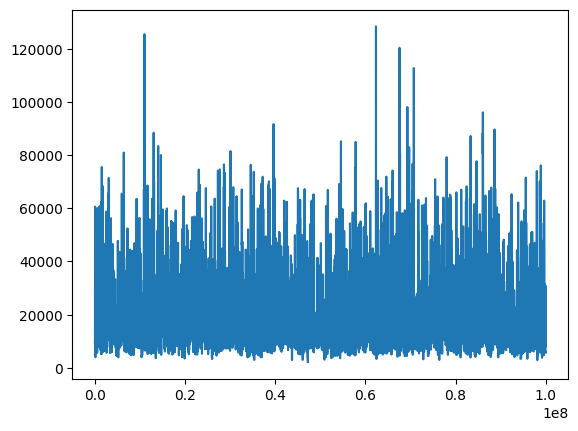

In [23]:
# Plot the tree heights after recapitation
breakpoints = list(recap_ts.breakpoints())
heights = tree_heights(recap_ts)
plt.step(breakpoints, heights, where='post')
plt.show()

In [8]:
np.random.seed(23)

alive = pyslim.individuals_alive_at(ts, 0)
locs = ts.individuals_location[alive, :]

W = 50
w = 5
groups = {
  'topleft' : alive[np.logical_and(locs[:, 0] < w, locs[:, 1] < w)],
  'topright' : alive[np.logical_and(locs[:, 0] < w, locs[:, 1] > W - w)],
  'bottomleft' : alive[np.logical_and(locs[:, 0] > W - w, locs[:, 1] < w)],
  'bottomright' : alive[np.logical_and(locs[:, 0] > W - w, locs[:, 1] > W - w)],
  'center' : alive[np.logical_and(np.abs(locs[:, 0] - W/2) < w/2,
                                  np.abs(locs[:, 1] - W/2) < w/2)]
  }

old_ones = pyslim.individuals_alive_at(ts, 1000)
groups['ancient'] = np.random.choice(old_ones, size=5)

for k in groups:
  print(f"We have {len(groups[k])} individuals in the {k} group.")

We have 249 individuals in the topleft group.
We have 0 individuals in the topright group.
We have 0 individuals in the bottomleft group.
We have 0 individuals in the bottomright group.
We have 0 individuals in the center group.
We have 5 individuals in the ancient group.


In [9]:
for i in groups["ancient"]:
  ind = ts.individual(i)
  # TODO: will work on next tskit release
  # assert(ind.time >= 1000 and ind.time < 1020)
  time = ts.node(ind.nodes[0]).time
  assert(time >= 1000 and time < 1020)

In [10]:
print("Locations:")
all_locs = ts.individuals_location
print(all_locs)
print("shape:")
all_locs.shape
print("topleft locations shape:")
all_locs[groups["topleft"], :].shape

Locations:
[[17.49478595 16.69575882  0.        ]
 [19.00124642 18.72912161  0.        ]
 [12.92686492 47.52134604  0.        ]
 ...
 [17.80388378 18.3750231   0.        ]
 [11.2193625  14.00677025  0.        ]
 [12.72893154 45.02244682  0.        ]]
shape:
topleft locations shape:


(249, 3)

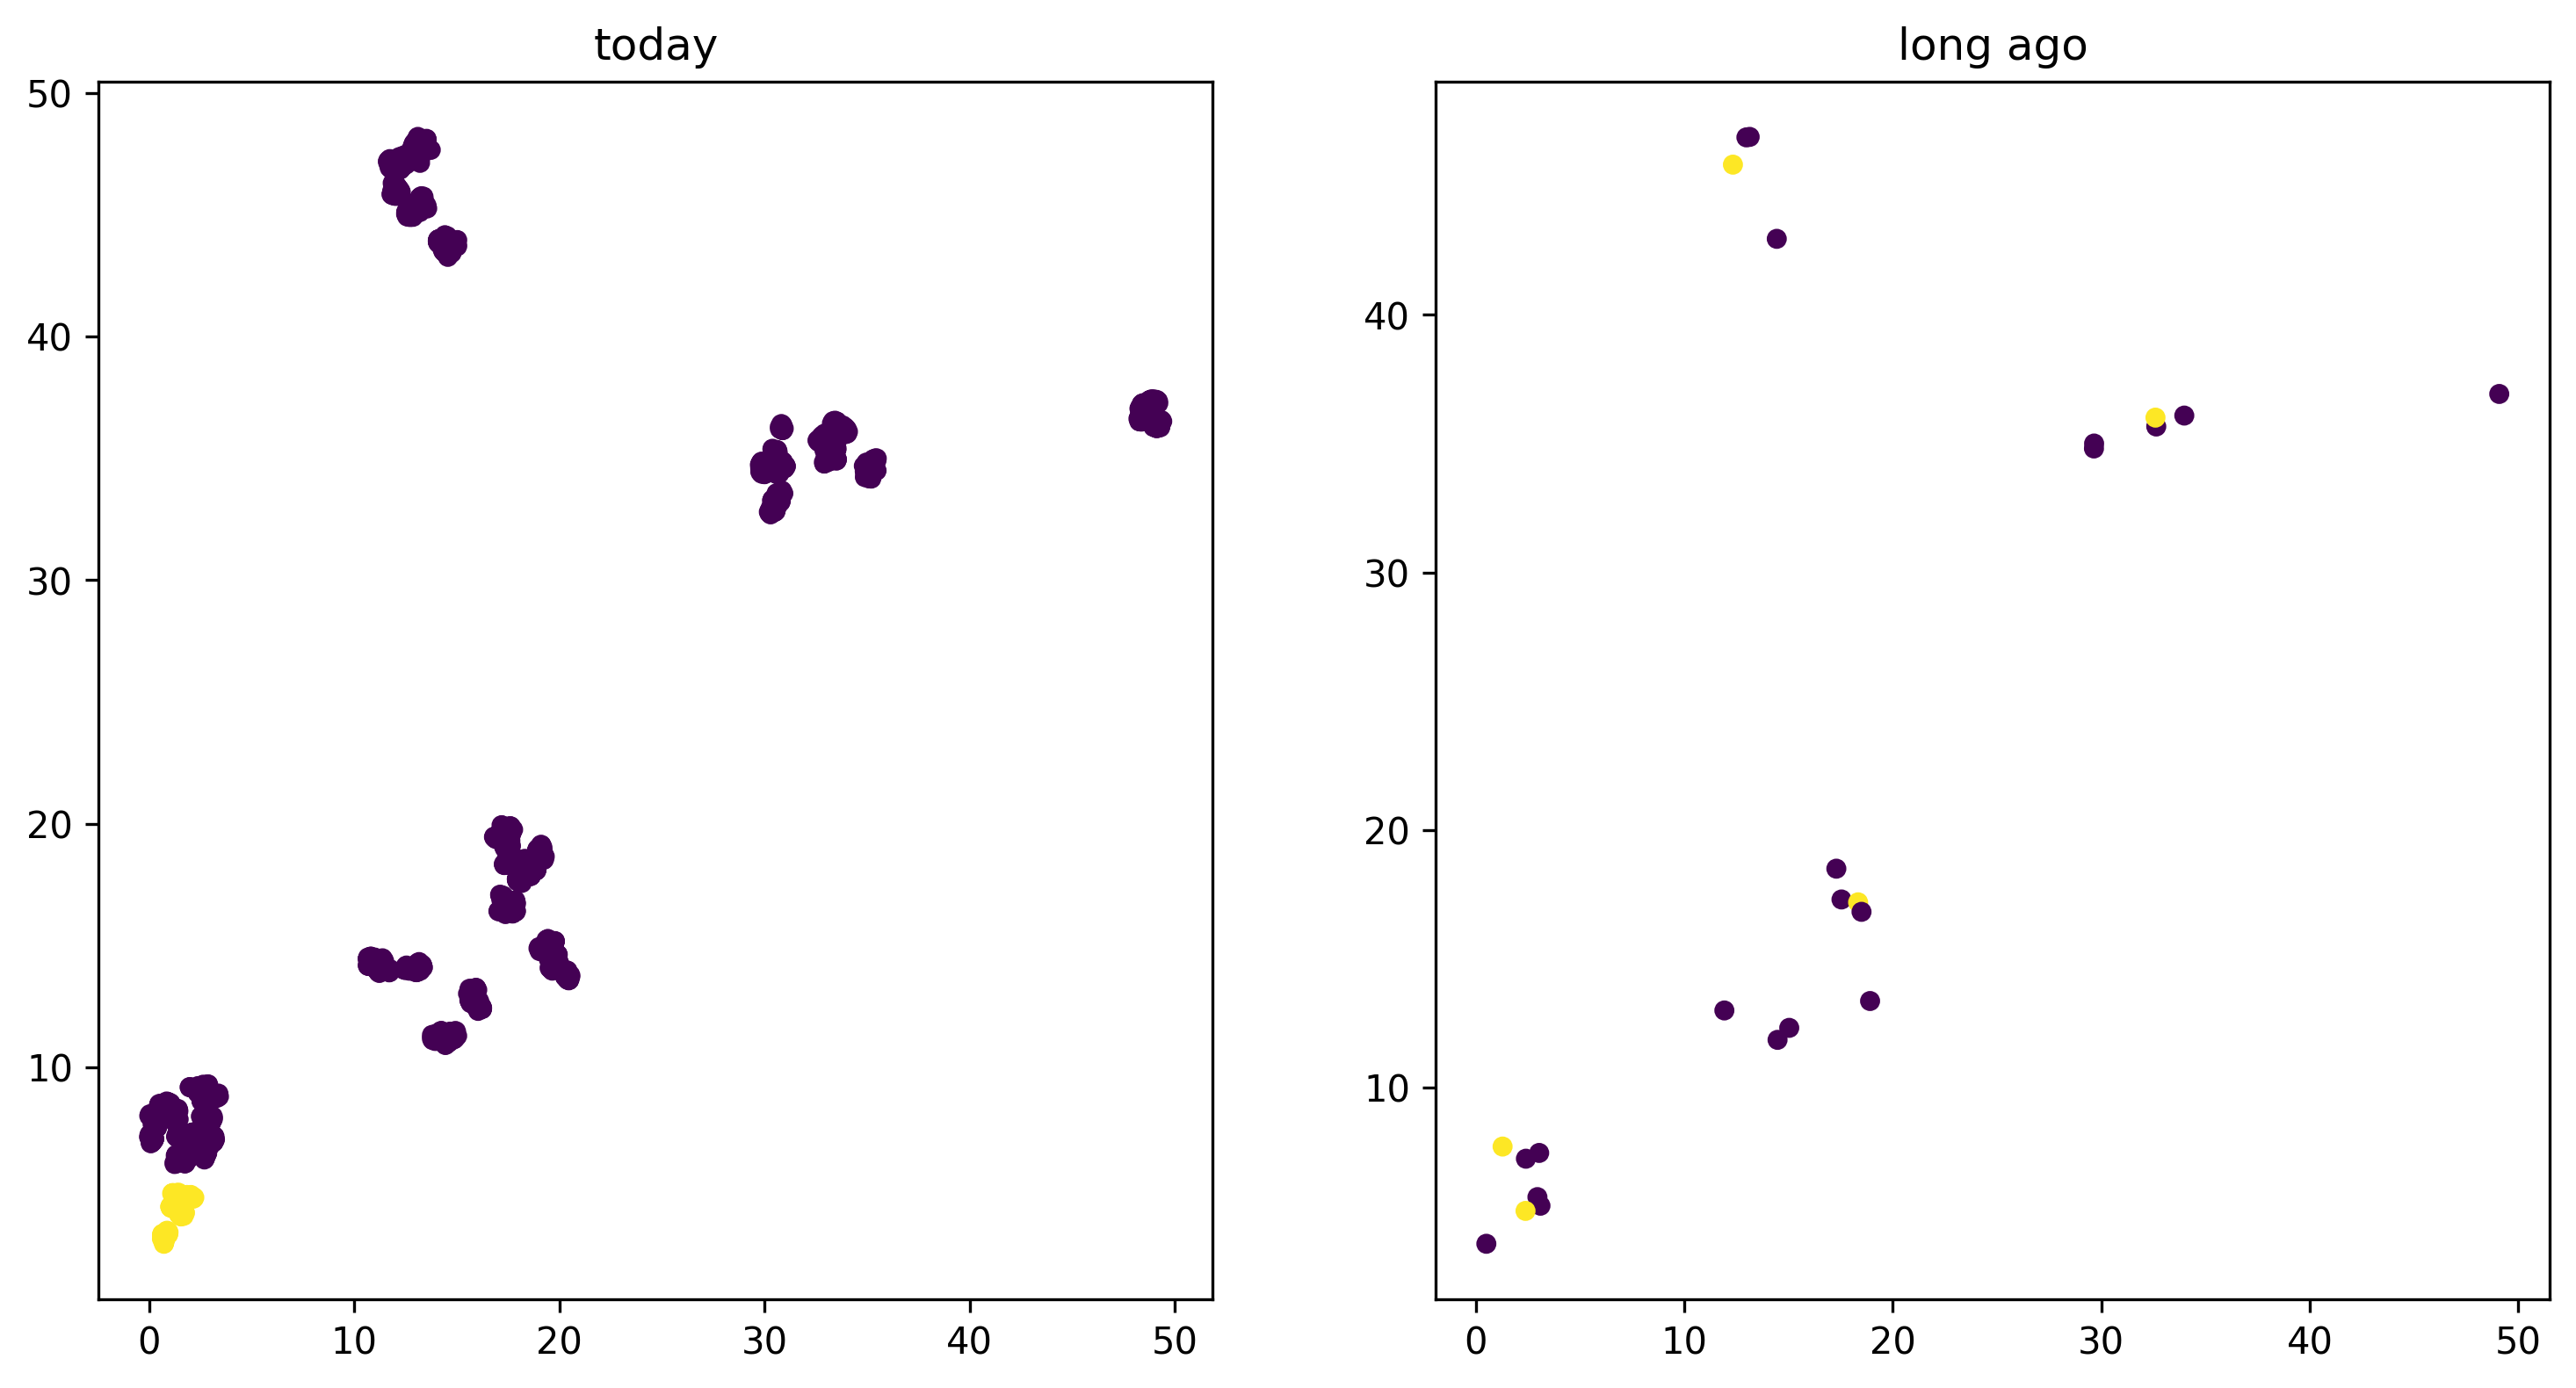

In [11]:

group_order = ['topleft', 'topright', 'bottomleft', 'bottomright', 'center', 'ancient']
ind_colors = np.repeat(0, ts.num_individuals)
for j, k in enumerate(group_order):
  ind_colors[groups[k]] = 1 + j

old_locs = ts.individuals_location[old_ones, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
ax1.set_title("today")
ax1.scatter(locs[:,0], locs[:,1], s=20, c=ind_colors[alive])
ax2.set_title("long ago")
ax2.scatter(old_locs[:, 0], old_locs[:, 1], s=20, c=ind_colors[old_ones]);

In [17]:
locs1 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 0), :]

In [ ]:
locs1 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 0), :]
locs2 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 1000), :]
locs3 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 5000), :]
locs4 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 10000), :]
locs5 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 15000), :]
locs5 = slim_ts.individuals_location[pyslim.individuals_alive_at(slim_ts, 19999), :]

fig, ax1 = plt.subplots(1, 3)
fig.set_size_inches(21, 12)
ax1[0,0].set_title("today")
ax1[0,0].scatter(locs1[:,0], locs1[:,1])
ax1[0,1].set_title("1000 gen ago")
ax1[0,1].scatter(locs2[:, 0], locs2[:, 1]);
ax1[0,2].set_title("5000 gen ago")
ax1[0,2].scatter(locs3[:, 0], locs3[:, 1]);
ax1[1,0].set_title("today")
ax1[1,0].scatter(locs4[:,0], locs4[:,1])
ax1[1,1].set_title("1000 gen ago")
ax1[1,1].scatter(locs5[:, 0], locs5[:, 1]);
ax1[1,2].set_title("5000 gen ago")
ax1[1,2].scatter(locs6[:, 0], locs6[:, 1]);

In [25]:
ts.trees()

In [26]:
for t in ts.trees():
    print(t)

╔═════════════════════════════════╗
║Tree                             ║
╠═══════════════════╤═════════════╣
║Index              │            0║
╟───────────────────┼─────────────╢
║Interval           │0-2250 (2250)║
╟───────────────────┼─────────────╢
║Roots              │            1║
╟───────────────────┼─────────────╢
║Nodes              │       257629║
╟───────────────────┼─────────────╢
║Sites              │           69║
╟───────────────────┼─────────────╢
║Mutations          │           71║
╟───────────────────┼─────────────╢
║Total Branch Length│    265591.02║
╚═══════════════════╧═════════════╝

╔══════════════════════════════════╗
║Tree                              ║
╠═══════════════════╤══════════════╣
║Index              │             1║
╟───────────────────┼──────────────╢
║Interval           │2250-2343 (93)║
╟───────────────────┼──────────────╢
║Roots              │             1║
╟───────────────────┼──────────────╢
║Nodes              │        257862║
╟────────────────

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │               19║
╟───────────────────┼─────────────────╢
║Interval           │13955-14056 (101)║
╟───────────────────┼─────────────────╢
║Roots              │                1║
╟───────────────────┼─────────────────╢
║Nodes              │           257914║
╟───────────────────┼─────────────────╢
║Sites              │                2║
╟───────────────────┼─────────────────╢
║Mutations          │                2║
╟───────────────────┼─────────────────╢
║Total Branch Length│        262676.73║
╚═══════════════════╧═════════════════╝

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │                20║
╟───────────────────┼──────────────────╢
║Interval           │14056-15364 (1308)║
╟───────────────────┼──────────────────╢
║Roots              │           

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │               39║
╟───────────────────┼─────────────────╢
║Interval           │32963-33095 (132)║
╟───────────────────┼─────────────────╢
║Roots              │                1║
╟───────────────────┼─────────────────╢
║Nodes              │           257965║
╟───────────────────┼─────────────────╢
║Sites              │                5║
╟───────────────────┼─────────────────╢
║Mutations          │                5║
╟───────────────────┼─────────────────╢
║Total Branch Length│        262727.73║
╚═══════════════════╧═════════════════╝

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │               40║
╟───────────────────┼─────────────────╢
║Interval           │33095-33327 (232)║
╟───────────────────┼─────────────────╢
║Roots              │                1║

╔════════════════════════════════════╗
║Tree                                ║
╠═══════════════════╤════════════════╣
║Index              │              60║
╟───────────────────┼────────────────╢
║Interval           │47578-47620 (42)║
╟───────────────────┼────────────────╢
║Roots              │               1║
╟───────────────────┼────────────────╢
║Nodes              │          258023║
╟───────────────────┼────────────────╢
║Sites              │               0║
╟───────────────────┼────────────────╢
║Mutations          │               0║
╟───────────────────┼────────────────╢
║Total Branch Length│       262785.73║
╚═══════════════════╧════════════════╝

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │               61║
╟───────────────────┼─────────────────╢
║Interval           │47620-47936 (316)║
╟───────────────────┼─────────────────╢
║Roots              │                1║
╟───────────────

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │               83║
╟───────────────────┼─────────────────╢
║Interval           │73365-73652 (287)║
╟───────────────────┼─────────────────╢
║Roots              │                1║
╟───────────────────┼─────────────────╢
║Nodes              │           259548║
╟───────────────────┼─────────────────╢
║Sites              │               12║
╟───────────────────┼─────────────────╢
║Mutations          │               12║
╟───────────────────┼─────────────────╢
║Total Branch Length│        260270.34║
╚═══════════════════╧═════════════════╝

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │               84║
╟───────────────────┼─────────────────╢
║Interval           │73652-74392 (740)║
╟───────────────────┼─────────────────╢
║Roots              │                1║

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │               103║
╟───────────────────┼──────────────────╢
║Interval           │84928-88463 (3535)║
╟───────────────────┼──────────────────╢
║Roots              │                 1║
╟───────────────────┼──────────────────╢
║Nodes              │            260655║
╟───────────────────┼──────────────────╢
║Sites              │               120║
╟───────────────────┼──────────────────╢
║Mutations          │               124║
╟───────────────────┼──────────────────╢
║Total Branch Length│         261377.34║
╚═══════════════════╧══════════════════╝

╔═════════════════════════════════════╗
║Tree                                 ║
╠═══════════════════╤═════════════════╣
║Index              │              104║
╟───────────────────┼─────────────────╢
║Interval           │88463-89232 (769)║
╟───────────────────┼─────────────────╢
║Roots              │ 

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │               123║
╟───────────────────┼──────────────────╢
║Interval           │99547-100000 (453)║
╟───────────────────┼──────────────────╢
║Roots              │                 1║
╟───────────────────┼──────────────────╢
║Nodes              │            260381║
╟───────────────────┼──────────────────╢
║Sites              │                11║
╟───────────────────┼──────────────────╢
║Mutations          │                11║
╟───────────────────┼──────────────────╢
║Total Branch Length│         261103.34║
╚═══════════════════╧══════════════════╝

